PCovR-Inspired Feature Selection 
==============================

In [1]:
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge as LR

from matplotlib import pyplot as plt
from matplotlib import cm

from tqdm.notebook import tqdm

import numpy as np

from skcosmo.feature_selection import FeatureCUR, FeatureFPS

cmap = cm.brg

For this, we will use the boston housing data provided by scikit-learn.

In [2]:
X, Y = load_boston(return_X_y=True)
Y = Y.reshape(X.shape[0], -1)

First, let's demonstrate CUR feature selection, and show the ten features chosen with a mixing parameter of 0.0, 0.5, and 1.0 perform.

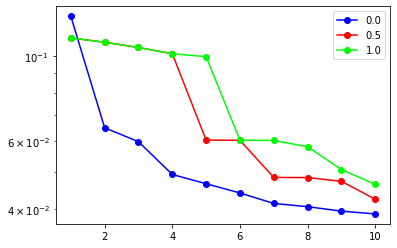

In [3]:
n = 10

for m in [0.0, 0.5, 1.0]:
    fs = FeatureCUR(X, # Matrix to select from
                        mixing=m, # Weight towards regression
                        Y=Y) # Y is an optional parameter when m = 1
    fs.select(n)

    errors = np.nan * np.zeros(len(fs.idx))
    for ni in range(len(fs.idx)):
        lr = LR()
        lr.fit(X[:, fs.idx[:ni+1]], Y)
        Yp = lr.predict(X[:, fs.idx[:ni+1]])
        errors[ni] = (np.linalg.norm(Y - Yp)**2.0 / np.linalg.norm(Y)**2.0)

    plt.semilogy(range(1,n+1), errors, label=m, c=cmap(m), marker='o')
    
plt.legend()
plt.show()

You can provide additional parameters to featureCUR, including:
- `tolerance`: (a cutoff for small eigenvalues, default=1E-12)
- `k`: number of eigenvectors to use in calculation of importance function $\pi$. (Recommended value: 1)
- `iterative`: (boolean) whether to compute the importance function $\pi$ iteratively

Next, let's look at FPS. We'll choose the first index from CUR at m = 1, which is 9.

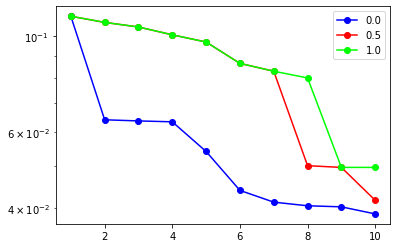

In [4]:
n = 10

for m in [0.0, 0.5, 1.0]:
    fs = FeatureFPS(X, 
                        mixing=m, 
                        Y=Y,
                        idxs = [9]
                       ) 
    fs.select(n)

    errors = np.nan * np.zeros(len(fs.idx))
    for ni in range(len(fs.idx)):
        lr = LR()
        lr.fit(X[:, fs.idx[:ni+1]], Y)
        Yp = lr.predict(X[:, fs.idx[:ni+1]])
        errors[ni] = (np.linalg.norm(Y - Yp)**2.0 / np.linalg.norm(Y)**2.0)

    plt.semilogy(range(1,n+1), errors, label=m, c=cmap(m), marker='o')
    
plt.legend()
plt.show()

You can provide additional parameters to featureFPS, including:
- `tolerance`: (a cutoff for small eigenvalues, default=1E-12)
- `idxs`: indices to use as the initial selections for FPS. If none are provided, the first selection is made at random.